In [61]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm_notebook as tqdm
import json
import matplotlib.pyplot as plt
import csv
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 7)
from sklearn.feature_extraction.text import CountVectorizer
import papermill as pm
from random import randint
from sklearn.metrics import f1_score
from statistics import mode
from sklearn.naive_bayes import BernoulliNB

In [2]:
def extract_data(filepath):
    dataset = []
    f = open(filepath)
    for line in f.readlines():
        edited_line = line.strip().replace('\'', '').lower()
        example = []
        example.append(edited_line[:-1].strip())
        example.append(int(edited_line[-1]))
        dataset.append(example)
    
    return dataset

In [3]:
"""
Extracting training datasets for Yelp and IMDB
"""

'\nExtracting training datasets for Yelp and IMDB\n'

In [4]:
yelp_train = extract_data('./hwk3_datasets/yelp-train.txt')
imdb_train = extract_data('./hwk3_datasets/IMDB-train.txt')

yelp_valid = extract_data('./hwk3_datasets/yelp-valid.txt')
imdb_valid = extract_data('./hwk3_datasets/IMDB-valid.txt')

yelp_test = extract_data('./hwk3_datasets/yelp-test.txt')
imdb_test = extract_data('./hwk3_datasets/IMDB-test.txt')

In [5]:
"""
Making dataframes for the train, valid and test sets of Yelp and IMDB
"""

'\nMaking dataframes for the train, valid and test sets of Yelp and IMDB\n'

In [6]:
yelp_columns = ['review', 'rating']
imdb_columns = ['review', 'sentiment']

yelp_train_df = pd.DataFrame(data=yelp_train, columns=yelp_columns)
imdb_train_df = pd.DataFrame(data=imdb_train, columns=imdb_columns)

yelp_valid_df = pd.DataFrame(data=yelp_valid, columns=yelp_columns)
imdb_valid_df = pd.DataFrame(data=imdb_valid, columns=imdb_columns)

yelp_test_df = pd.DataFrame(data=yelp_test, columns=yelp_columns)
imdb_test_df = pd.DataFrame(data=imdb_test, columns=imdb_columns)

In [7]:
"""
Storing the input (reviews) for the
train, valid and test sets of Yelp and IMDB
"""

'\nStoring the input (reviews) for the\ntrain, valid and test sets of Yelp and IMDB\n'

In [8]:
yelp_train_input = list(yelp_train_df['review'])
imdb_train_input = list(imdb_train_df['review'])

yelp_valid_input = list(yelp_valid_df['review'])
imdb_valid_input = list(imdb_valid_df['review'])

yelp_test_input = list(yelp_test_df['review'])
imdb_test_input = list(imdb_test_df['review'])

In [9]:
"""
Storing the rating (Yelp) and sentiment (IMDB)
for the train, valid and test sets of Yelp and IMDB
"""

'\nStoring the rating (Yelp) and sentiment (IMDB)\nfor the train, valid and test sets of Yelp and IMDB\n'

In [10]:
yelp_train_output = list(yelp_train_df['rating'])
imdb_train_output = list(imdb_train_df['sentiment'])

yelp_valid_output = list(yelp_valid_df['rating'])
imdb_valid_output = list(imdb_valid_df['sentiment'])

yelp_test_output = list(yelp_test_df['rating'])
imdb_test_output = list(imdb_test_df['sentiment'])

In [11]:
"""
Using a CountVectorizer will turn the
words into lowercase and remove the punctuations
"""

'\nUsing a CountVectorizer will turn the\nwords into lowercase and remove the punctuations\n'

In [12]:
yelp_vectorizer = CountVectorizer()
yelp_vectors_train = yelp_vectorizer.fit_transform(yelp_train_input)

imdb_vectorizer = CountVectorizer()
imdb_vectors_train = imdb_vectorizer.fit_transform(imdb_train_input)

In [13]:
"""
Get the frequency of the
words in a vocabulary.

Return: A dictionary
which has the structure - 
    key = word
    value = [id, count]
"""

'\nGet the frequency of the\nwords in a vocabulary.\n\nReturn: A dictionary\nwhich has the structure - \n    key = word\n    value = [id, count]\n'

In [14]:
def get_vocab_frequencies(dataset_input, dataset_vectorizer):
    word_id_count = {}
    for example in dataset_input:
        words = example.split()
        for word in words:
            if word in dataset_vectorizer.vocabulary_:
                if word not in word_id_count:
                    word_id_count[word] = [dataset_vectorizer.vocabulary_[word], 1]
                else:
                    word_id_count[word][1] += 1

    return word_id_count

In [15]:
yelp_train_frequencies = get_vocab_frequencies(yelp_train_input, yelp_vectorizer)
imdb_train_frequencies = get_vocab_frequencies(imdb_train_input, imdb_vectorizer)

In [16]:
"""
Sorting the words in the dictionary
in descending order of frequencies.
Getting the top 10,000 words (words
with the highest frequencies). These
words form the feature set.
"""

'\nSorting the words in the dictionary\nin descending order of frequencies.\nGetting the top 10,000 words (words\nwith the highest frequencies). These\nwords form the feature set.\n'

In [17]:
yelp_feature_set = sorted(yelp_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]
imdb_feature_set = sorted(imdb_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]

In [18]:
"""
Binary Bag-of-Words Representation:-

Making a new vectorizer for Yelp and IMDB.
The new vectorizer is based on the 10,000
words with the highest frequencies.

Transform the valid and test input according
to the vectorizer just found. Convert the result
into an array. Modify the array such that the
value along a dimension gets set to 1 if its
value is greater than zero else it gets set to 0.
"""

'\nBinary Bag-of-Words Representation:-\n\nMaking a new vectorizer for Yelp and IMDB.\nThe new vectorizer is based on the 10,000\nwords with the highest frequencies.\n\nTransform the valid and test input according\nto the vectorizer just found. Convert the result\ninto an array. Modify the array such that the\nvalue along a dimension gets set to 1 if its\nvalue is greater than zero else it gets set to 0.\n'

In [19]:
# Train vectors are wrong
# yelp_vectorizer_final_binary = CountVectorizer()
# yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
# yelp_vectors_train_final_binary = yelp_vectorizer_final_binary.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_binary = (yelp_vectors_train_final_binary.toarray() > 0).astype(int)

# yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

# yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
# yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [20]:
yelp_vectorizer_final_binary = CountVectorizer()
yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
yelp_vectorizer_final_binary = yelp_vectorizer_final_binary.fit(list(yelp_temp_df["word"]))

yelp_train_temp1 = yelp_vectorizer_final_binary.transform(yelp_train_input).toarray()
yelp_vectors_train_binary = (yelp_train_temp1 > 0).astype(int)

yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [21]:
imdb_vectorizer_final_binary = CountVectorizer()
imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
imdb_vectorizer_final_binary = imdb_vectorizer_final_binary.fit(list(imdb_temp_df["word"]))

imdb_train_temp1 = imdb_vectorizer_final_binary.transform(imdb_train_input).toarray()
imdb_vectors_train_binary = (imdb_train_temp1 > 0).astype(int)

imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [22]:
# # Train vectors are wrong
# imdb_vectorizer_final_binary = CountVectorizer()
# imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
# imdb_vectors_train_final_binary = imdb_vectorizer_final_binary.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_binary = (imdb_vectors_train_final_binary.toarray() > 0).astype(int)

# imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

# imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
# imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [23]:
"""
Frequency Bag-of-Words representation
"""

'\nFrequency Bag-of-Words representation\n'

In [24]:
def make_frequency_array(arr):
    for i in range(len(arr)):
        example_sum = arr[i].sum()
        if example_sum != 0:
            arr[i] = arr[i]/example_sum
    
    return arr

In [25]:
# train vectors are wrong
# yelp_vectorizer_final_frequency = CountVectorizer()
# yelp_vectors_train_final_frequency = yelp_vectorizer_final_frequency.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_frequency = make_frequency_array(yelp_vectors_train_final_frequency.toarray().astype(float))

# yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

# yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
# yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [26]:
yelp_vectorizer_final_frequency = CountVectorizer()
yelp_vectorizer_final_frequency = yelp_vectorizer_final_frequency.fit(list(yelp_temp_df["word"]))

yelp_train_temp2 = yelp_vectorizer_final_frequency.transform(yelp_train_input).toarray()
yelp_vectors_train_frequency = make_frequency_array(yelp_train_temp2.astype(float))

yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [27]:
imdb_vectorizer_final_frequency = CountVectorizer()
imdb_vectorizer_final_frequency = imdb_vectorizer_final_frequency.fit(list(imdb_temp_df["word"]))

imdb_train_temp2 = imdb_vectorizer_final_frequency.transform(imdb_train_input).toarray()
imdb_vectors_train_frequency = make_frequency_array(imdb_train_temp2.astype(float))

imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [28]:
# Train vectors are wrong
# imdb_vectorizer_final_frequency = CountVectorizer()
# imdb_vectors_train_final_frequency = imdb_vectorizer_final_frequency.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_frequency = make_frequency_array(imdb_vectors_train_final_frequency.toarray().astype(float))

# imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

# imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
# imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [29]:
imdb_vectors_test_binary.shape

(25000, 10000)

In [30]:
"""
Generating the data files
for the submission

Commented out since do not
have to write the files again
"""

'\nGenerating the data files\nfor the submission\n\nCommented out since do not\nhave to write the files again\n'

In [31]:
# with open('./Files_to_submit/data/q1/yelp-vocab.txt', 'w') as f:
#     for feature in yelp_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [32]:
# with open('./Files_to_submit/data/q1/IMDB-vocab.txt', 'w') as f:
#     for feature in imdb_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [33]:
def write_dataset_file(vocab, dataset_df, filename, label_name):
    with open('./Files_to_submit/data/q1/' + filename, 'w') as f:
        for i in range(len(dataset_df)):
            review = dataset_df['review'][i]
            word_ids = []
            for word in review.split():
                if word in vocab:
                    word_ids.append(str(int(vocab[word][0])))
                    
            f.write(' '.join(word_ids))
            f.write('\t' + str(int(dataset_df[label_name][i])))
            f.write('\n')

In [34]:
# yelp_dictionary = dict(yelp_feature_set)
# imdb_dictionary = dict(imdb_feature_set)

# write_dataset_file(yelp_dictionary, yelp_train_df, 'yelp-train.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_valid_df, 'yelp-valid.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_test_df, 'yelp-test.txt', yelp_columns[1])

# write_dataset_file(imdb_dictionary, imdb_train_df, 'IMDB-train.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_valid_df, 'IMDB-valid.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_test_df, 'IMDB-test.txt', imdb_columns[1])

In [35]:
##### PART 2 #####

In [36]:
### 2.a ###

In [37]:
"""
Yelp Random Classifier
"""

'\nYelp Random Classifier\n'

In [50]:
yelp_test_random_pred = [randint(1,5) for i in range(len(yelp_test_output))]

In [51]:
yelp_test_random_f1_score = f1_score(yelp_test_output, yelp_test_random_pred, average='micro')

In [52]:
yelp_test_random_f1_score

0.194

In [ ]:
pm.record("2a. Yelp Random F1", str(yelp_test_random_f1_score))

In [53]:
"""
Yelp Majority Classifier
"""

'\nYelp Majority Classifier\n'

In [54]:
yelp_train_majority = mode(yelp_train_output)

In [55]:
yelp_test_majority_pred = [yelp_train_majority for i in range(len(yelp_test_output))]

In [56]:
yelp_test_majority_f1_score = f1_score(yelp_test_output, yelp_test_majority_pred, average='micro')

In [57]:
yelp_test_majority_f1_score

0.351

In [ ]:
pm.record("2a. Yelp Majority F1", str(yelp_test_majority_f1_score))

In [58]:
### 2.b ###

In [79]:
alpha_vals = [i/50 for i in range(1, 51)]
yelp_bbow_bernoullinb_valid_f1_scores = []
for val_alpha in tqdm(alpha_vals):
    yelp_bbow_bernoullinb_clf = BernoulliNB(alpha=val_alpha)
    yelp_bbow_bernoullinb_clf = yelp_bbow_bernoullinb_clf.fit(yelp_vectors_train_binary, yelp_train_output)
    yelp_bbow_bernoullinb_valid_pred = yelp_bbow_bernoullinb_clf.predict(yelp_vectors_valid_binary)
    f1 = f1_score(yelp_valid_output, yelp_bbow_bernoullinb_valid_pred, average='micro')
    yelp_bbow_bernoullinb_valid_f1_scores.append(f1)

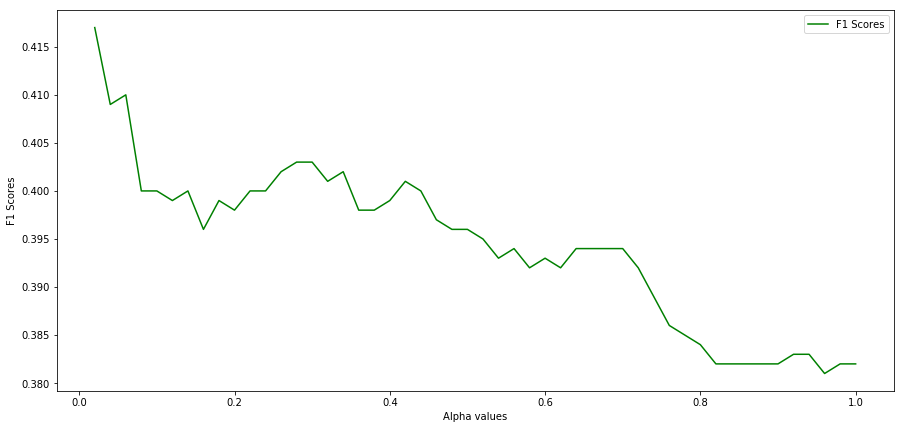

In [80]:
plt.plot(alpha_vals, yelp_bbow_bernoullinb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Alpha values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [81]:
max_index = yelp_bbow_bernoullinb_valid_f1_scores.index(max(yelp_bbow_bernoullinb_valid_f1_scores))
best_bbow_bernoullinb_alpha = alpha_vals[max_index]

In [86]:
best_bbow_bernoullinb_alpha

0.02

In [87]:
def get_bbow_bernoullinb_f1(train_vectors, train_output, best_bbow_bernoullinb_alpha, dataset_vectors, dataset_output):
    best_bbow_bernoullinb_clf = BernoulliNB(alpha=best_bbow_bernoullinb_alpha)
    best_bbow_bernoullinb_clf = best_bbow_bernoullinb_clf.fit(train_vectors, train_output)
    bbow_bernoullinb_dataset_pred = best_bbow_bernoullinb_clf.predict(dataset_vectors)
    bbow_bernoullinb_dataset_f1 = f1_score(dataset_output, bbow_bernoullinb_dataset_pred, average='micro')

    return bbow_bernoullinb_dataset_f1

In [88]:
yelp_bbow_bernoullinb_train_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_train_binary, yelp_train_output)
yelp_bbow_bernoullinb_valid_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_valid_binary, yelp_valid_output)
yelp_bbow_bernoullinb_test_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_test_binary, yelp_test_output)

In [89]:
print("Yelp Binary BoW BernoulliNB Train F1 Score:", yelp_bbow_bernoullinb_train_f1)
print("Yelp Binary BoW BernoulliNB Valid F1 Score:", yelp_bbow_bernoullinb_valid_f1)
print("Yelp Binary BoW BernoulliNB Test F1 Score:", yelp_bbow_bernoullinb_test_f1)
print("Best Binary BoW BernoulliNB Alpha Value: ", best_bbow_bernoullinb_alpha)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7315714285714285
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.417
Yelp Binary BoW BernoulliNB Test F1 Score: 0.436
Best Binary BoW BernoulliNB Alpha Value:  0.02
